<a href="https://colab.research.google.com/github/Sneha514-glich/Projects-/blob/main/Machine%20learning_LAB%20programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML !ST Program

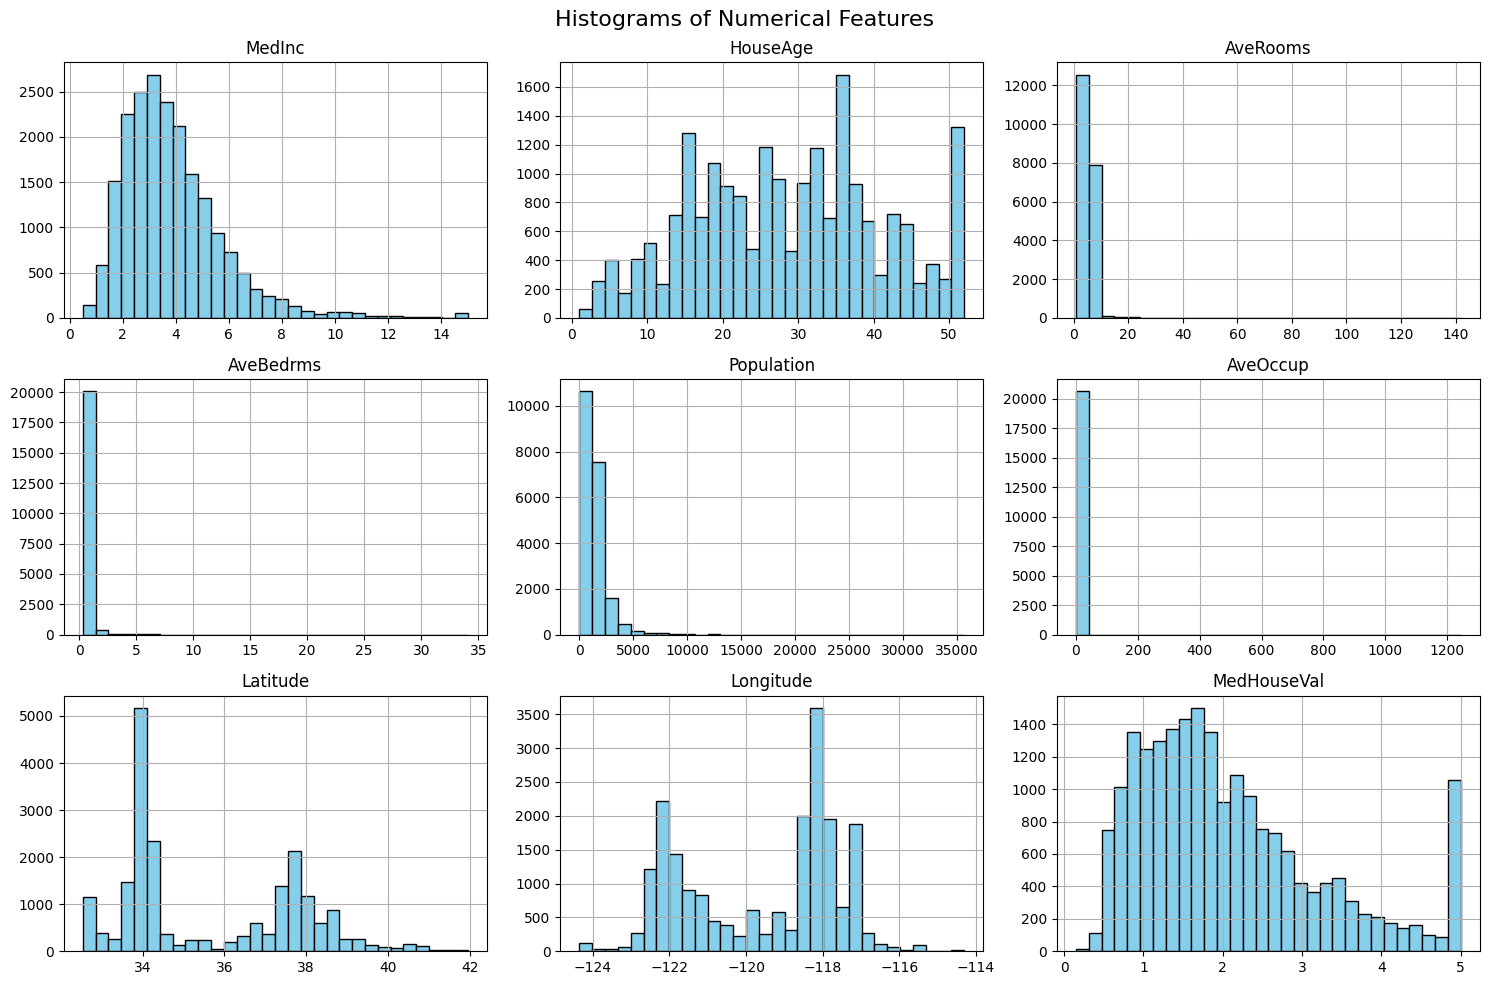

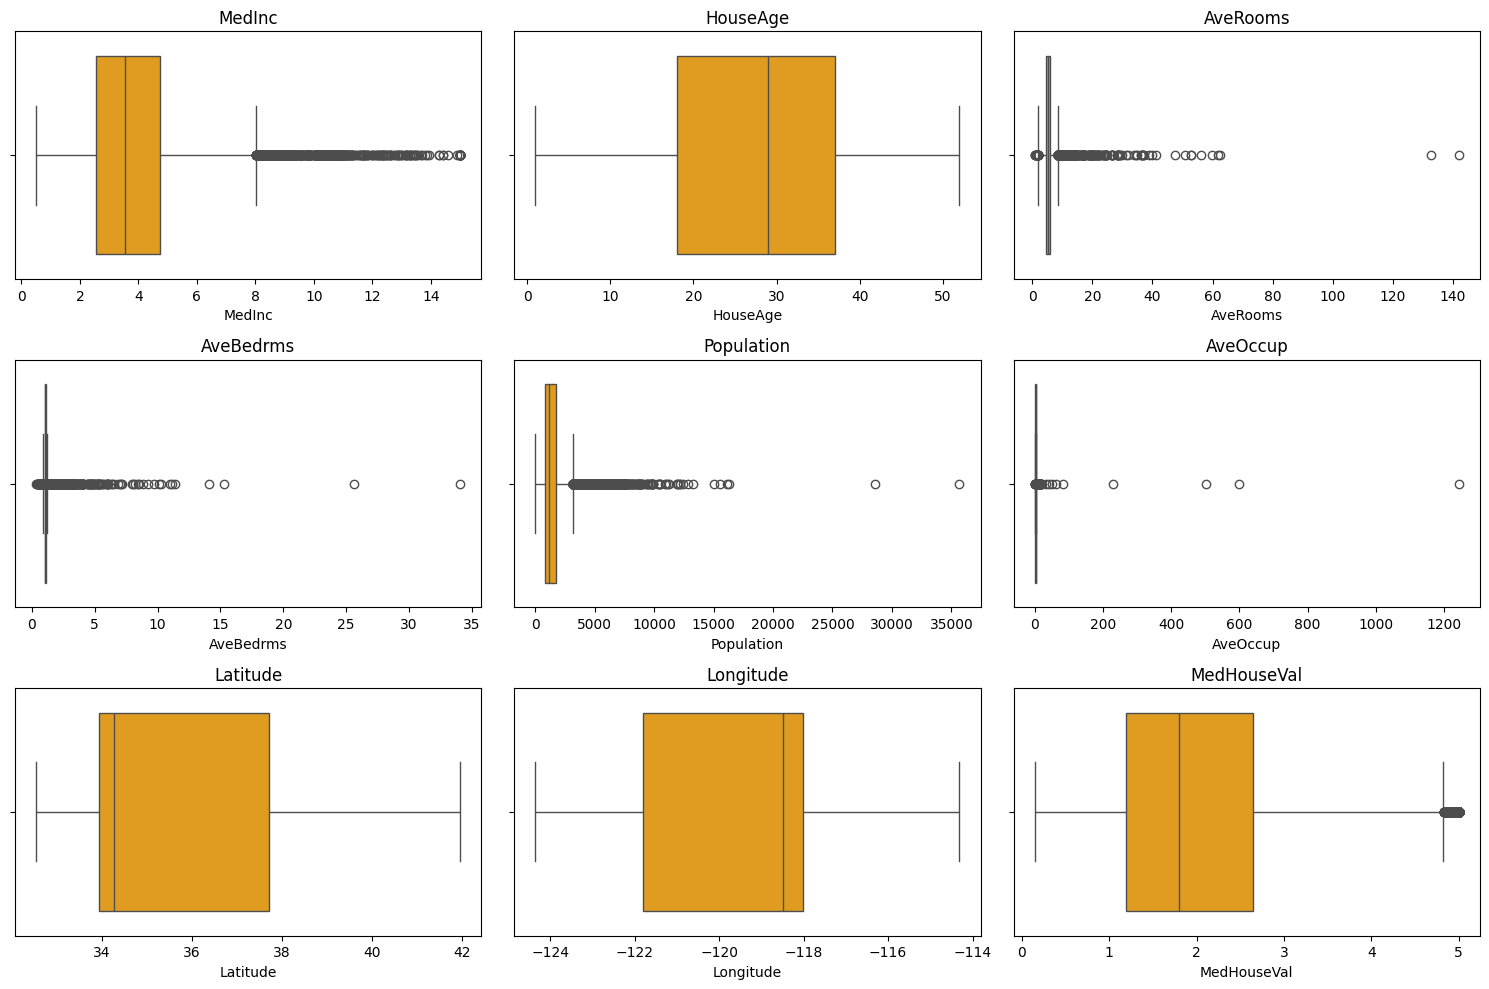

Outliers Detection:
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers

Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Lon

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load dataset
df = fetch_california_housing(as_frame=True).frame
num_cols = df.select_dtypes(include='number').columns

# Histograms
df[num_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

# Outlier Detection using IQR
print("Outliers Detection:")
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")

# Summary
print("\nDataset Summary:")
print(df.describe())


# New section

ML 3rd

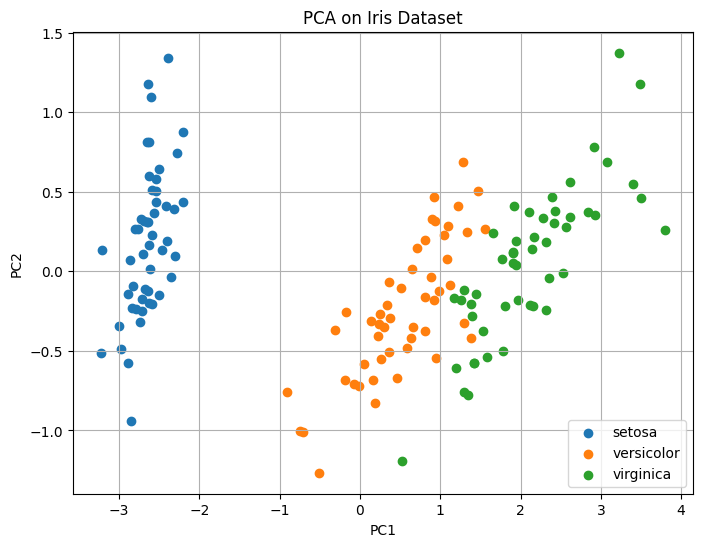

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load data and apply PCA
iris = load_iris()
pca_data = PCA(n_components=2).fit_transform(iris.data)

# Create DataFrame
df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df['Label'] = iris.target

# Plot
plt.figure(figsize=(8, 6))
for i, name in enumerate(iris.target_names):
    plt.scatter(df[df.Label == i]['PC1'], df[df.Label == i]['PC2'], label=name)
plt.title('PCA on Iris Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()


ML 5th

--- k-NN Classification ---

k = 1
x51 (0.1586) → Class1
x52 (0.6025) → Class2
x53 (0.6310) → Class2
x54 (0.0635) → Class1
x55 (0.5155) → Class2
x56 (0.8081) → Class2
x57 (0.7802) → Class2
x58 (0.3587) → Class1
x59 (0.8088) → Class2
x60 (0.7414) → Class2
x61 (0.6932) → Class2
x62 (0.6762) → Class2
x63 (0.4335) → Class1
x64 (0.7254) → Class2
x65 (0.1352) → Class1
x66 (0.9378) → Class2
x67 (0.7741) → Class2
x68 (0.0941) → Class1
x69 (0.7355) → Class2
x70 (0.6485) → Class2
x71 (0.2911) → Class1
x72 (0.0681) → Class1
x73 (0.5016) → Class1
x74 (0.9158) → Class2
x75 (0.6225) → Class2
x76 (0.1202) → Class1
x77 (0.1499) → Class1
x78 (0.4056) → Class1
x79 (0.8830) → Class2
x80 (0.2759) → Class1
x81 (0.8621) → Class2
x82 (0.9356) → Class2
x83 (0.4368) → Class1
x84 (0.1937) → Class1
x85 (0.8462) → Class2
x86 (0.5685) → Class2
x87 (0.5662) → Class2
x88 (0.7795) → Class2
x89 (0.4620) → Class1
x90 (0.3689) → Class1
x91 (0.5899) → Class2
x92 (0.7279) → Class2
x93 (0.5390) → Class2
x94 (0.2188) → Clas

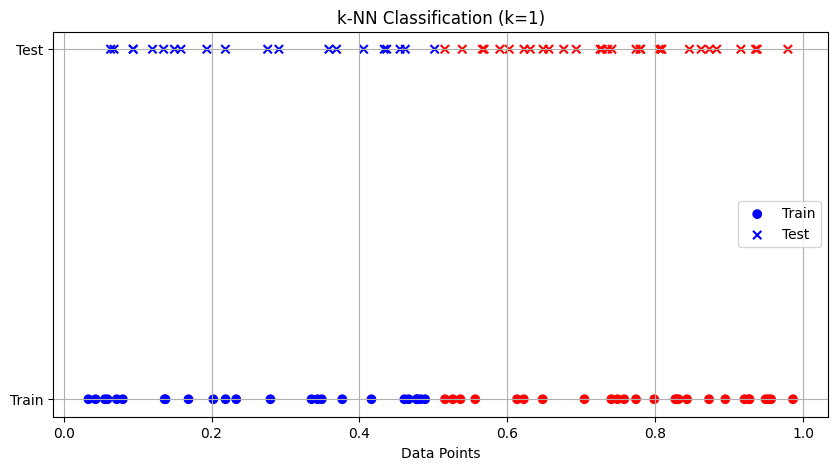

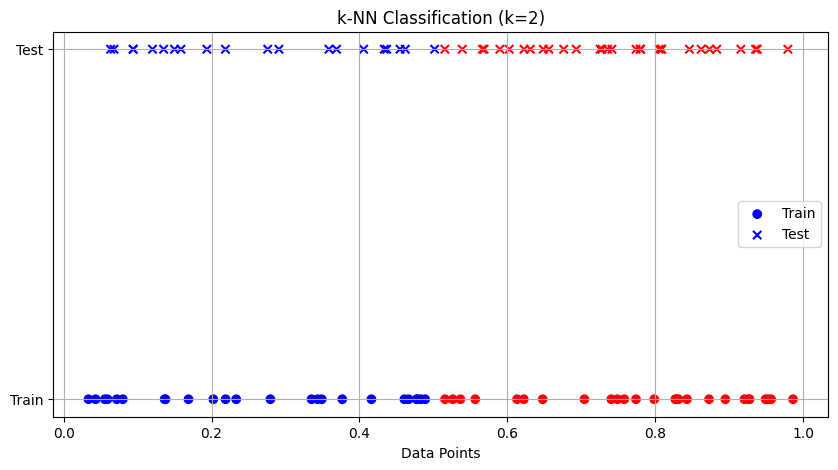

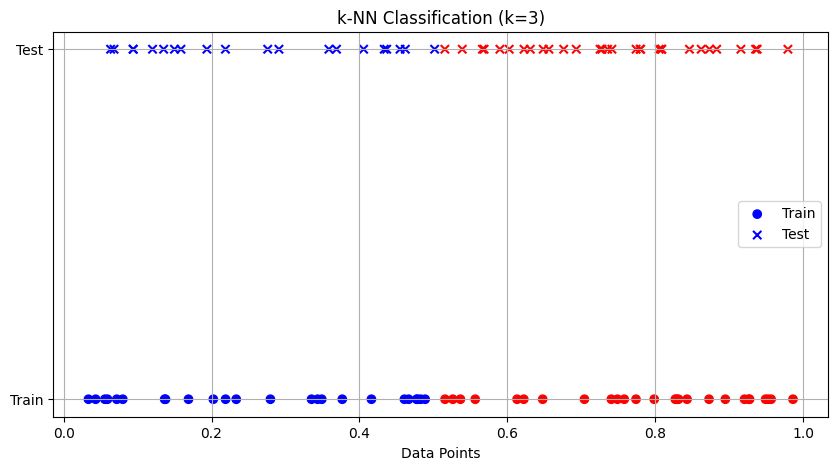

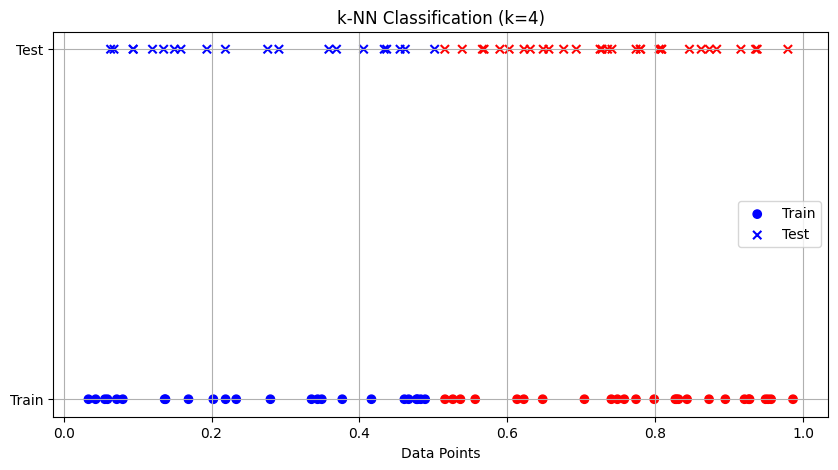

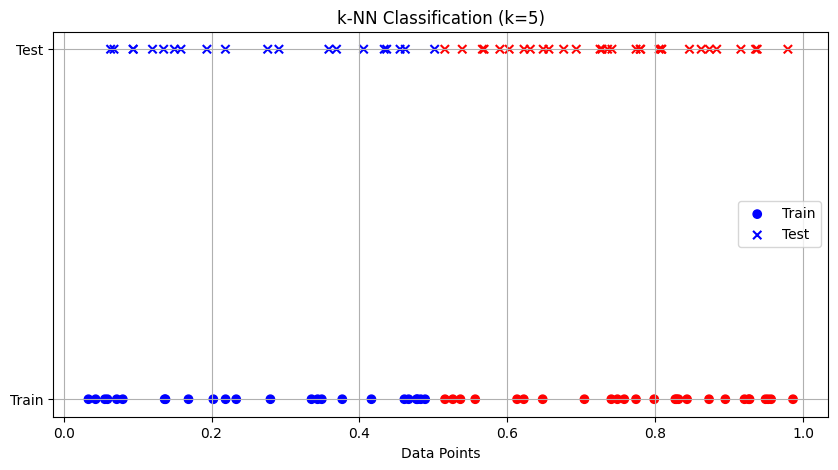

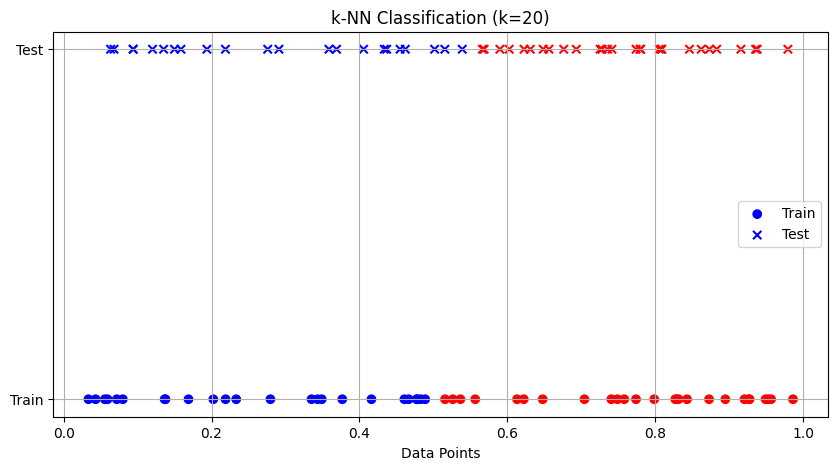

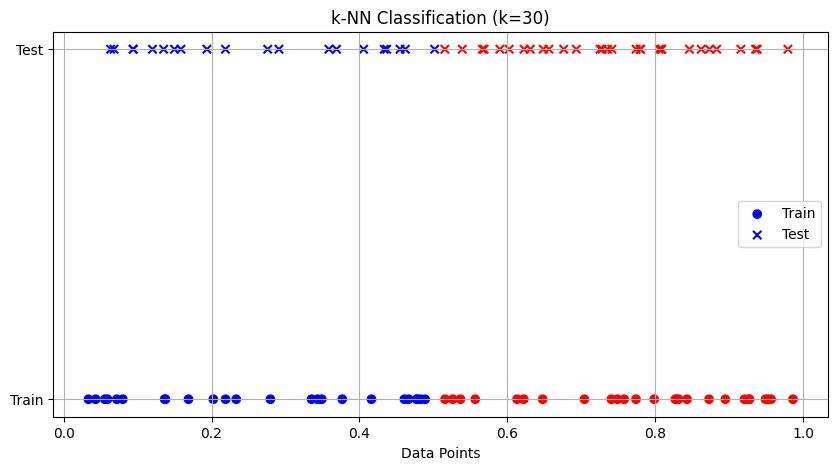

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Generate random data
data = np.random.rand(100)
train_data, test_data = data[:50], data[50:]
train_labels = ["Class1" if x <= 0.5 else "Class2" for x in train_data]

# k-NN function
def knn(train_X, train_y, test_x, k):
    dists = sorted([(abs(test_x - x), y) for x, y in zip(train_X, train_y)])
    return Counter([label for _, label in dists[:k]]).most_common(1)[0][0]

# k values to test
k_values = [1, 2, 3, 4, 5, 20, 30]
results = {}

print("--- k-NN Classification ---")
for k in k_values:
    print(f"\nk = {k}")
    preds = [knn(train_data, train_labels, x, k) for x in test_data]
    results[k] = preds
    for i, label in enumerate(preds):
        print(f"x{i+51} ({test_data[i]:.4f}) → {label}")

# Plot results
for k in k_values:
    preds = results[k]
    plt.figure(figsize=(10, 5))
    plt.scatter(train_data, [0]*50, c=['blue' if l == 'Class1' else 'red' for l in train_labels], label='Train', marker='o')
    plt.scatter(test_data, [1]*50, c=['blue' if l == 'Class1' else 'red' for l in preds], label='Test', marker='x')
    plt.title(f"k-NN Classification (k={k})")
    plt.xlabel("Data Points")
    plt.yticks([0, 1], ['Train', 'Test'])
    plt.legend()
    plt.grid(True)
    plt.show()


ML 6th

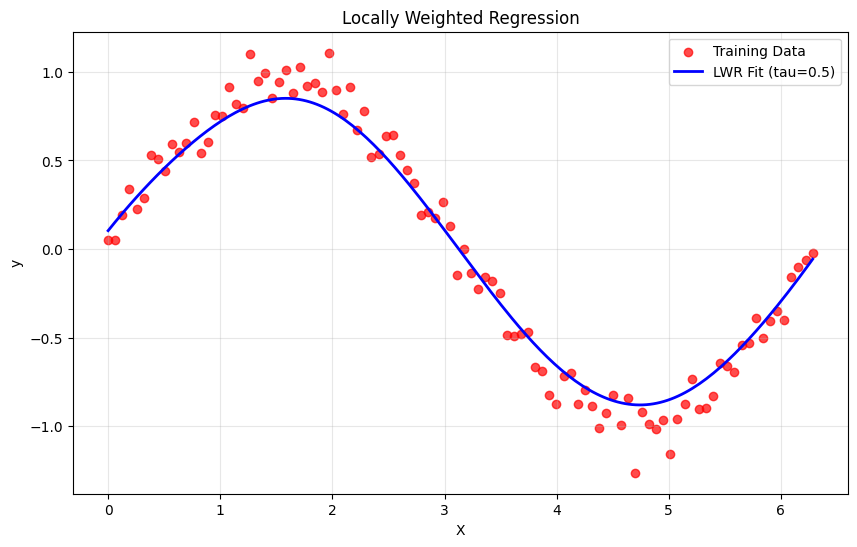

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian kernel
def kernel(x, X, tau):
    return np.exp(-np.sum((X - x)**2, axis=1) / (2 * tau**2))

# Locally Weighted Regression
def lwr(x, X, y, tau):
    W = np.diag(kernel(x, X, tau))
    theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
    return x @ theta

# Data
np.random.seed(42)
X = np.linspace(0, 2*np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_ = np.c_[np.ones(X.shape), X]

# Prediction
x_test = np.linspace(0, 2*np.pi, 200)
x_test_ = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5
y_pred = [lwr(x, X_, y, tau) for x in x_test_]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, c='blue', label=f'LWR Fit (tau={tau})', lw=2)
plt.title('Locally Weighted Regression')
plt.xlabel('X'); plt.ylabel('y')
plt.legend(); plt.grid(alpha=0.3)
plt.show()


7th

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression on California Housing
def linear_regression_california():
    data = fetch_california_housing(as_frame=True).frame
    X, y = data[["AveRooms"]], data["MedHouseVal"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, c="blue", label="Actual", alpha=0.6)
    plt.plot(X_test, y_pred, c="red", label="Predicted")
    plt.xlabel("AveRooms"); plt.ylabel("MedHouseVal ($100,000)")
    plt.title("Linear Regression - California Housing")
    plt.legend(); plt.grid(True); plt.show()

    print("\nLinear Regression - California Housing")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))

# Polynomial Regression on Auto MPG
def polynomial_regression_auto_mpg():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    cols = ["mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin"]
    df = pd.read_csv(url, sep='\s+', names=cols, na_values="?").dropna()

    X, y = df[["disp"]], df["mpg"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression()).fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, c="blue", label="Actual", alpha=0.6)
    plt.scatter(X_test, y_pred, c="red", label="Predicted", s=15)
    plt.xlabel("Displacement"); plt.ylabel("MPG")
    plt.title("Polynomial Regression - Auto MPG")
    plt.legend(); plt.grid(True); plt.show()

    print("\nPolynomial Regression - Auto MPG")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))

# Run both
if __name__ == "__main__":
    print("Linear and Polynomial Regression Demonstration")
    linear_regression_california()
    polynomial_regression_auto_mpg()
